![gym](gym.png)


You are a product manager for a fitness studio and are interested in understanding the current demand for digital fitness classes. You plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

In [194]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [195]:
## Load data on global interest in workouts

workout = pd.read_csv("data/workout.csv")
workout.head()
workout["month"] = pd.to_datetime(workout["month"])
workout.head()

,month,workout_worldwide
0,2018-03-01,59
1,2018-04-01,61
2,2018-05-01,57
3,2018-06-01,56
4,2018-07-01,51


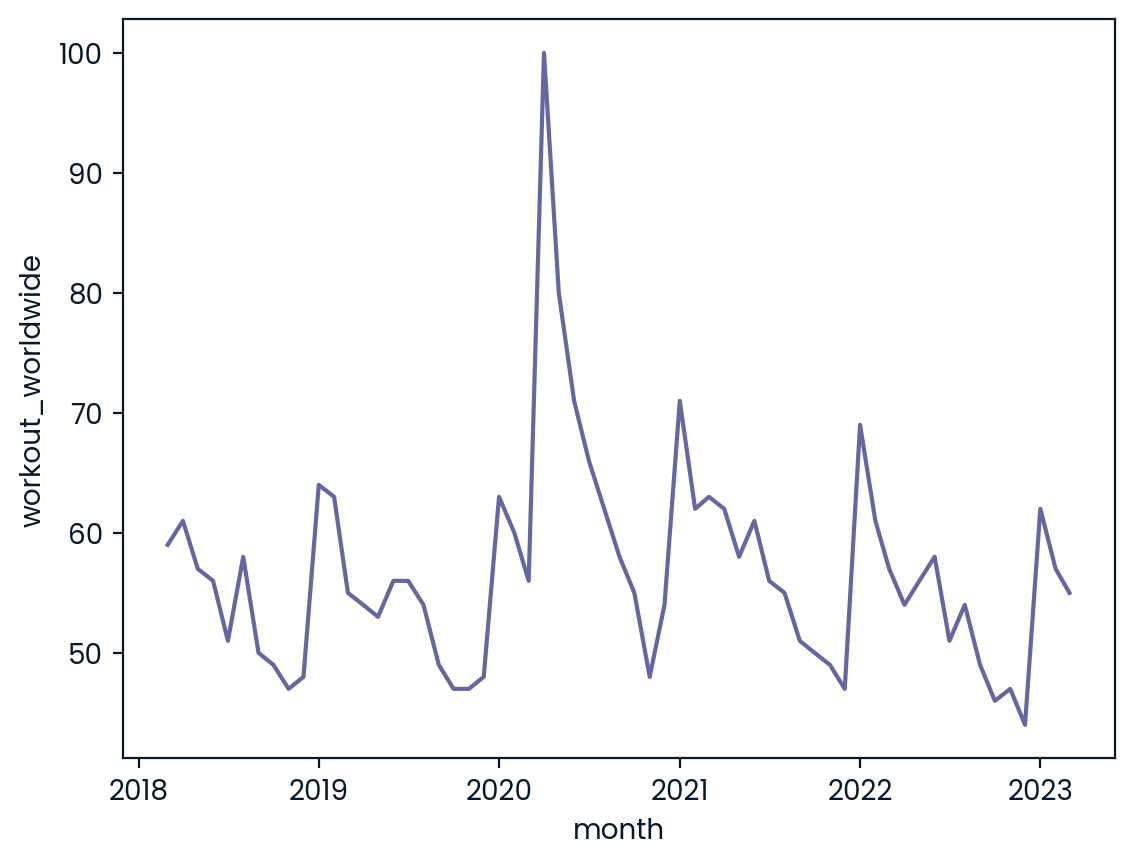

In [196]:
## Find the time of peak searches for workout
import seaborn as sns
sns.lineplot(data=workout, x="month", y="workout_worldwide")
plt.show()


In [197]:
## Find the most popular keywords for the current year and during covid
three_k = pd.read_csv("data/three_keywords.csv")
three_k["month_date"]= pd.to_datetime(three_k["month"])
three_k["year"] = three_k["month_date"].dt.year.astype(int)
three_k.head()

In [205]:
## Find the most popular keywords for the current year and during covid
peak_covid = three_k[(three_k["year"] >= 2020) & (three_k["year"]<= 2021)]
three_k.head()
covid_means = peak_covid[["home_workout_worldwide", "gym_workout_worldwide", "home_gym_worldwide"]].mean()
covid_top = covid_means.idxmax()
print("Najpopularniejsze słowo podczas COVID:", covid_top)
# current year
latest_year = three_k["year"].max()
current = three_k[three_k["year"] == latest_year]
means = current[["home_workout_worldwide", "gym_workout_worldwide", "home_gym_worldwide"]].mean()
latest_year_top = means.idxmax()
print("Najpopularniejsze słowo w tym roku:", latest_year_top)



Najpopularniejsze słowo podczas COVID: home_workout_worldwide
Najpopularniejsze słowo w tym roku: gym_workout_worldwide


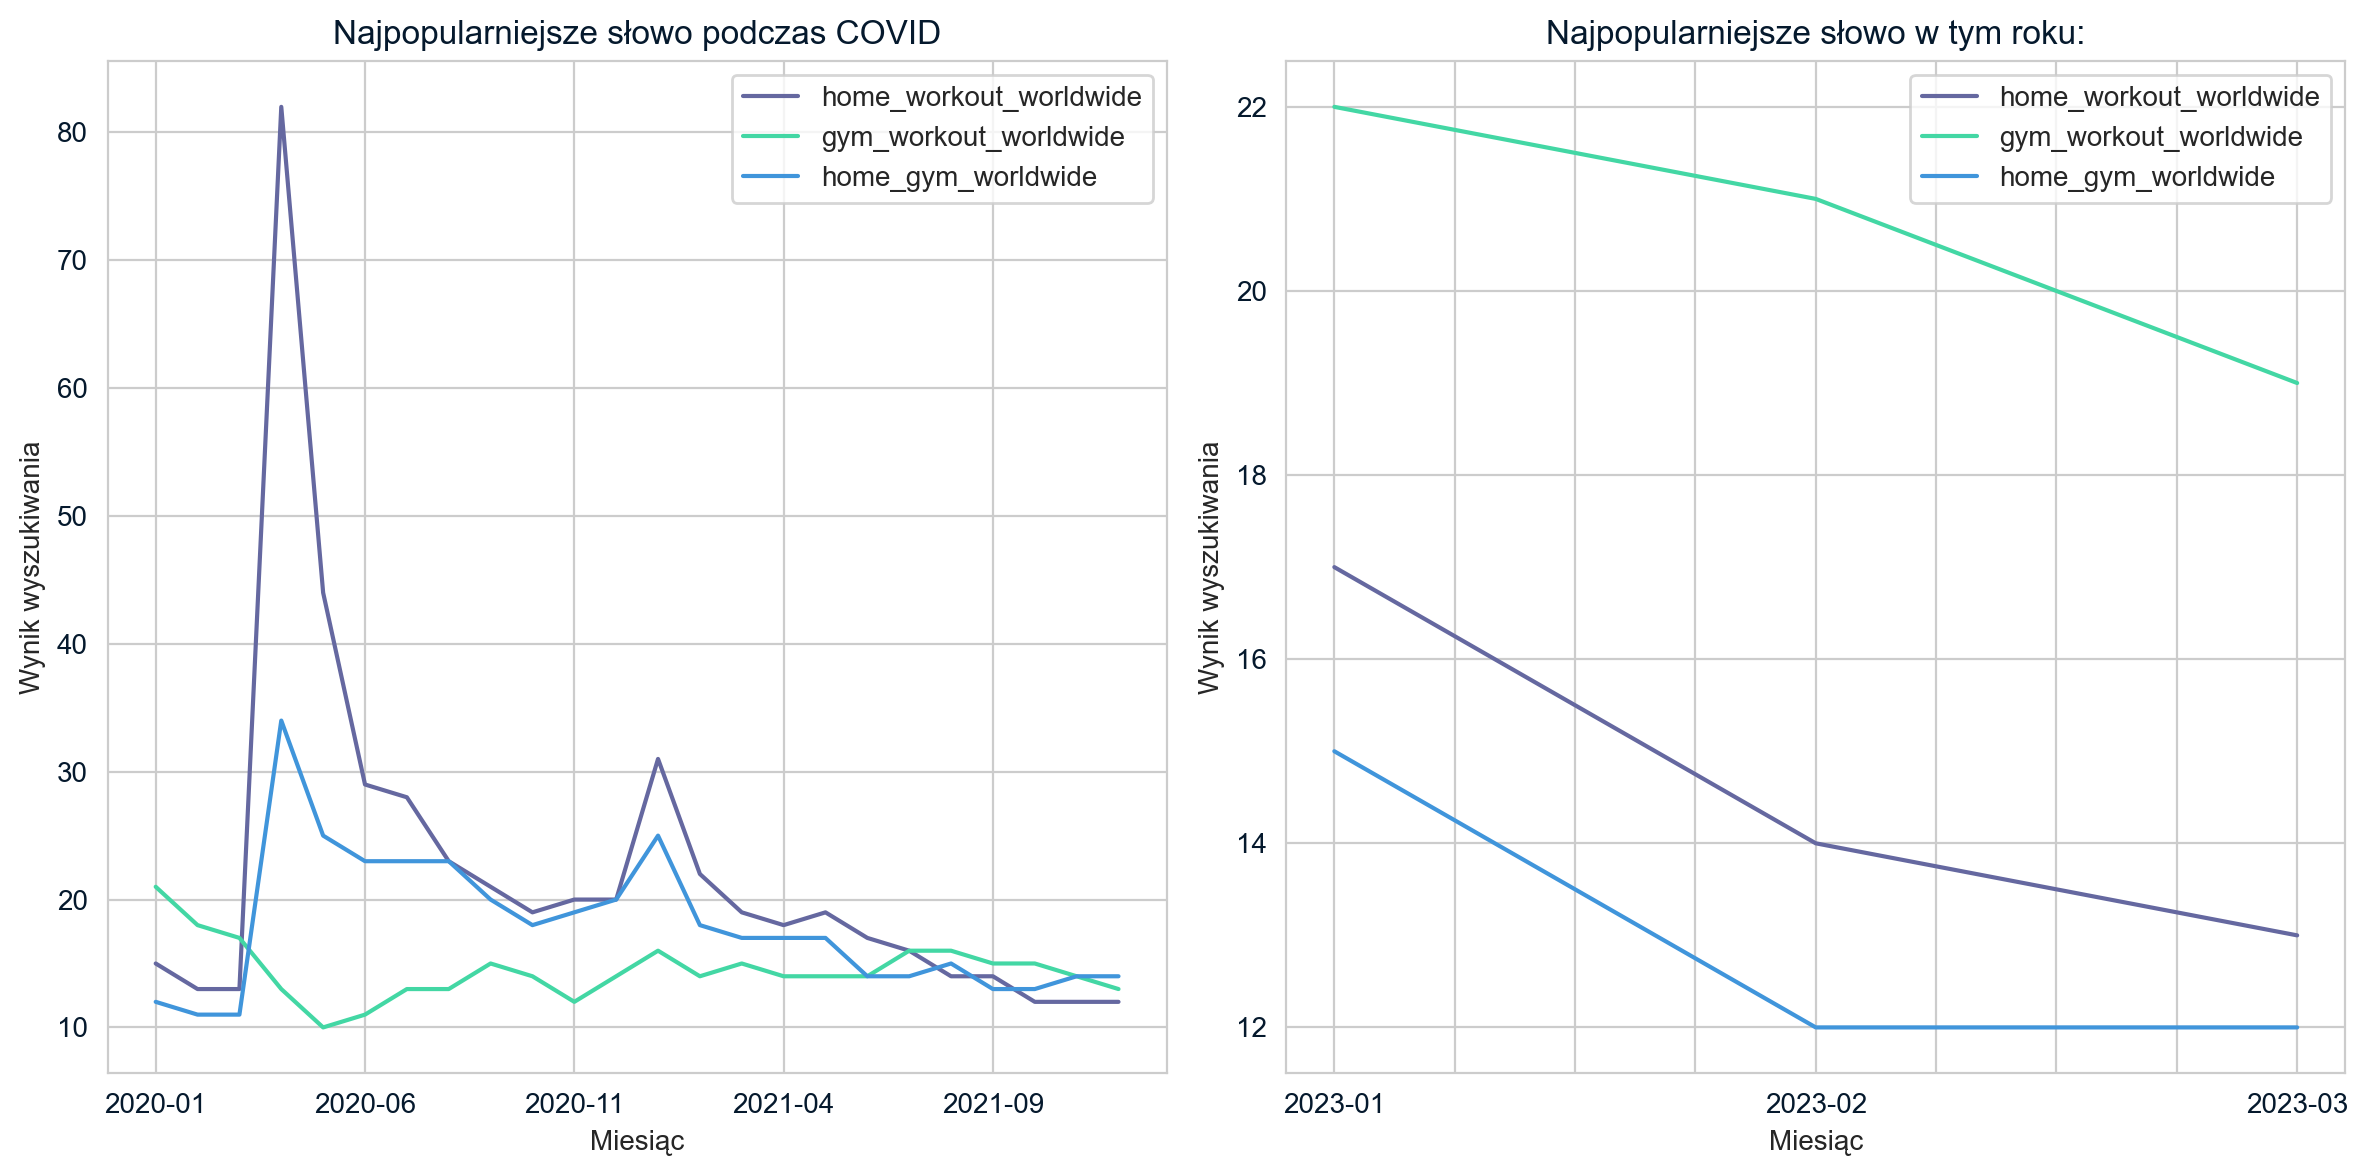

In [206]:
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,2 , figsize=(12,6))
peak_covid.plot(x="month", y=["home_workout_worldwide", "gym_workout_worldwide", "home_gym_worldwide"],ax=ax[0])
ax[0].set_title("Najpopularniejsze słowo podczas COVID")
ax[0].set_xlabel("Miesiąc")
ax[0].set_ylabel("Wynik wyszukiwania")

## drugi wykres
current.plot(x="month", y=["home_workout_worldwide", "gym_workout_worldwide", "home_gym_worldwide"], ax=ax[1])
ax[1].set_title("Najpopularniejsze słowo w tym roku:")
ax[1].set_xlabel("Miesiąc")
ax[1].set_ylabel("Wynik wyszukiwania")

plt.tight_layout()
plt.show()


In [200]:
#Find the country with the highest interest for workouts
country_table = pd.read_csv("data/workout_geo.csv")
country_table.head()
max_country = country_table.loc[country_table["workout_2018_2023"].idxmax(), "country"]
print(max_country)


United States


In [201]:
# Find the country in the MESA region with the highest interest in home workouts
geo = pd.read_csv("data/three_keywords_geo.csv")
geo.head(15)
mesa_region = ["Algeria", "Bahrain", "Egypt", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Libya", "Morocco", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "Tunisia", "United Arab Emirates"," Yemen"]
meda_data = geo[geo["Country"].isin(mesa_region)]
top_country = mesa_data.sort_values(by="home_workout_2018_2023", ascending=False).iloc[0]["country"]
print(top_country)


Iran


In [202]:
home_workout_geo1 = geo[geo["Country"].isin(["Philippines","Malaysia"])]
home_workout_geo2 = home_workout_geo1.sort_values(
    by="home_workout_2018_2023", ascending=False
).iloc[0]["Country"]
print(home_workout_geo2)

Philippines


The global peak of interest in “workout” occurred in 2020, coinciding with the COVID-19 lockdown period.
During the pandemic, “home workout” dominated global search trends, while in 2023 “gym workout” regained popularity.
The United States showed the highest overall interest.
Within the MESA region, Iran had the highest search index for home workouts.
Between the Philippines and Malaysia, the Philippines showed greater engagement with home workouts.